# **Polynomial Regression**

### Importing All Necessary Libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Data Framing

In [79]:
df = pd.read_csv('salary.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manger,5,110000


In [80]:
print(f"data shape: {df.shape}\n") # Checking data shape
print(df.isnull().sum(), "\n") # Checking null values
print(df.describe())

data shape: (10, 3)

Position    0
Level       0
Salary      0
dtype: int64 

          Level          Salary
count  10.00000       10.000000
mean    5.50000   216500.000000
std     3.02765   285054.088435
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   215000.000000
max    10.00000  1000000.000000


### **Preprocessing**

Convert Position column to the str data type

In [81]:
df['Position'] = df['Position'].astype(str)
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manger,5,110000


### Plotting barplot between Position and Salary columns to know their relationship

C:\Users\Noor\AppData\Local\Temp\ipykernel_15392\616369781.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Position', y='Salary', data=df, estimator=np.mean, ci=None, palette='viridis')
C:\Users\Noor\AppData\Local\Temp\ipykernel_15392\616369781.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Position', y='Salary', data=df, estimator=np.mean, ci=None, palette='viridis')


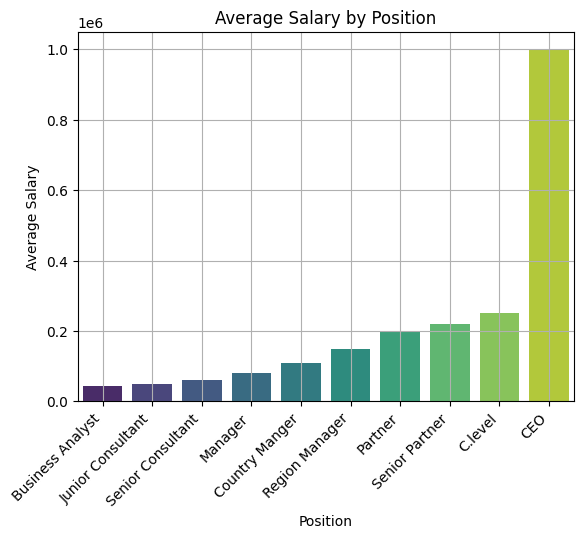

In [82]:
import seaborn as sns
# Create a bar plot for Salary vs Position
sns.barplot(x='Position', y='Salary', data=df, estimator=np.mean, ci=None, palette='viridis')

# Add title and labels
plt.title('Average Salary by Position')
plt.xlabel('Position')
plt.ylabel('Average Salary')

# Rotate the x labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid()  
plt.show()

### Selecting and reshaping the features (X) and target variable (y)

In [83]:
X = df[["Level"]].values.reshape(-1, 1)  #.values is converting dataframe into array
print(X)
y = df[["Salary"]].values.reshape(-1, 1)
print(y)     

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 220000]
 [ 250000]
 [1000000]]


### **Training the Model**

In [84]:
from sklearn.pipeline import make_pipeline
# Polynomial transformation and model fitting
poly = PolynomialFeatures(degree=4)
model = make_pipeline(poly, LinearRegression())
model.fit(X, y)

"""poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(y)
poly.fit(X_poly, y)"""

'poly = PolynomialFeatures(degree = 2)\nX_poly = poly.fit_transform(y)\npoly.fit(X_poly, y)'

### **Plotting the data points**

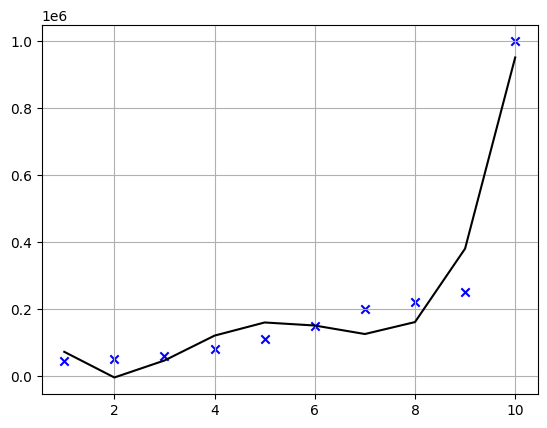

In [85]:
plt.grid()
plt.scatter(X, y, color='blue', marker='x')
plt.plot(X, model.predict(X), color='black')

### **Prediction**

Predicting the Salary by giving level as input

In [86]:
print('Prediction of Salary: ', model.predict([[10]]))

Prediction of Salary:  [[952202.79720294]]


### Calculating Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE) and  R-squared value

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the whole dataset
y_pred = model.predict(X)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R²)
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

Mean Squared Error: 3643560606.0606627
Mean Absolute Error: 49879.953379969156
Root Mean Squared Error: 60361.91353875938
R-squared: 0.9501771072017303


Based on the metrics provided, here are the conclusions about the model:

1. High R-squared (0.950): Indicates the model explains 95% of the variance, suggesting a good fit.
2. High MSE (3643560606.06): Large error magnitude suggests the model's predictions have significant deviations from actual values.
3. High MAE (49879.95): On average, predictions deviate by approximately 49879.95 units from actual values.
4. High RMSE (60361.91): Indicates substantial prediction errors, in the same unit as the target variable.

While the high R-squared indicates a good fit, the high MSE, MAE, and RMSE values suggest significant prediction errors, implying the model's performance might be problematic.